xor


 Input is:  [[0 0]
 [0 1]
 [1 0]
 [1 1]] 

 Output is:  [[0]
 [1]
 [1]
 [0]] 


Initial hidden layer 1 weights: [ 2.21998508 -1.02069595] [-0.22214    1.0798519]
Initial hidden layer 2 weights: [-0.34058343  1.19300978 -0.24779642 -0.51331689] [-0.0290343   0.24333296  0.51032372 -1.95655943]
Initial output weights: [-0.7970677] [-1.17475925] [-1.32601296] [-1.14501308]
Initial hidden layer 1 biases: [1. 1.]
Initial hidden layer 2 biases: [1. 1. 1. 1.]
Initial output biases: [1.]
Iteration: 0. Error: 0.783168804640492
Iteration: 1000. Error: 0.4926604894614457
Iteration: 2000. Error: 0.35512892420173153
Iteration: 3000. Error: 0.33309311848088685
Iteration: 4000. Error: 0.015734235300336116
Iteration: 5000. Error: 0.005201775615460699
Iteration: 6000. Error: 0.002917930569947651
Iteration: 7000. Error: 0.0019828183431270137
Iteration: 8000. Error: 0.0014856270945839915
Iteration: 9000. Error: 0.0011805108662131447
Iteration: 10000. Error: 0.0009755094989592643
Iteration: 11000. Error: 

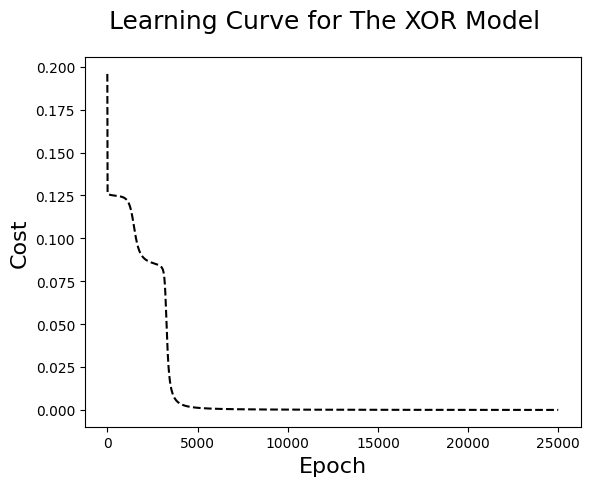

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import figure, axes, pie, title, show
Input_Neurons  = 2
Hidden1_Neurons = 2
Hidden2_Neurons = 4
Output_Neurons = 1

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

print('','Input is: ', x, '\n')
print('','Output is: ', y, '\n\n')
wh1 = np.random.randn(Input_Neurons, Hidden1_Neurons) # size of [2,4]
wh2 = np.random.randn(Hidden1_Neurons, Hidden2_Neurons) # size of [4,2]
wo  = np.random.randn(Hidden2_Neurons, Output_Neurons) # size of [2,1]

print("Initial hidden layer 1 weights: ",end='')
print(*wh1)
print("Initial hidden layer 2 weights: ",end='')
print(*wh2)
print("Initial output weights: ",end='')
print(*wo)
bh1 = np.ones((1, Hidden1_Neurons))
bh2 = np.ones((1, Hidden2_Neurons))
bo  = np.ones((1, Output_Neurons))

print("Initial hidden layer 1 biases: ",end='')
print(*bh1)
print("Initial hidden layer 2 biases: ",end='')
print(*bh2)
print("Initial output biases: ",end='')
print(*bo)
epochs = 25000
learn = 0.3
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Defining the derivative of the relu which will be used in back propagation to
# avoid unnecessary repeated computation
def sigmoid_prime(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

# Now proceeding to forward propagation and back propagation functions
def forward_propagation(x, wh1, wh2, wo, bh1, bh2, bo):

    # Forward propagation starts with the projection of input into weight matrix

    # Zh = Hidden weighted input
    Zh1 = np.dot(x, wh1)
    # Adding bias to the weighted input
    Zh1 += bh1
    # ReLU activation
    H1 = sigmoid(Zh1)

    # Continious for the next hidden layer
    Zh2 = np.dot(H1, wh2)
    # Adding bias to the hidden weighted input
    Zh2 += bh2
    # ReLU activation
    H2 = sigmoid(Zh2)

    # Zo = Output weighted input
    Zo = np.dot(H2, wo)
    # Adding bias to the output weighted input
    Zo += bo
    # ReLU activation
    obtained_y = sigmoid(Zo)

    return Zh1, Zh2, H1, H2, Zo, obtained_y
def cost(obtained_y,y):
    return ((obtained_y-y)**2)/2

# Defining the derivative of the cost function
def cost_prime(obtained_y, y):
    return obtained_y - y

# Proceeding to define back propagation
def back_propagation(x, y, wh1, wh2, wo, bh1, bh2, bo):

 # Error
    error = cost(obtained_y, y)

 # Layer Error
    Eo  = cost_prime(obtained_y, y) * sigmoid_prime(Zo)
    Eh2 = (Eo.dot(wo.transpose())) * sigmoid_prime(Zh2)
    Eh1 = (Eh2.dot(wh2.transpose())) * sigmoid_prime(Zh1)

 # Cost derivative for weights
    d_wo  = H2.T.dot(Eo)
    d_wh2 = H1.T.dot(Eh2)
    d_wh1 = x.T.dot(Eh1)
    return error, Eo, Eh1, Eh2, d_wo, d_wh1, d_wh2
costs = []
epoch_number = []

for i in range(epochs):

    # forward
    Zh1, Zh2, H1, H2, Zo, obtained_y = forward_propagation(x, wh1, wh2, wo, bh1, bh2, bo)

    # backward
    error, Eo, Eh1, Eh2, d_wo, d_wh1, d_wh2 = back_propagation(x, y, wh1, wh2, wo, bh1, bh2, bo)

    # Update weights and biases
    wo  -= d_wo * learn
    bo  -= np.sum(Eo) * learn
    wh2 -= d_wh2 * learn
    bh2 -= np.sum(Eh2) * learn
    wh1 -= d_wh1 * learn
    bh1 -= np.sum(Eh1) * learn

    co = np.mean(np.abs(error))
    costs.append(co)
    epoch_number.append(i)

    if i % 1000 == 0:
        print(f"Iteration: {i}. Error: {np.sum(cost(obtained_y, y))}")

# Training Completed
print("\nTraining is completed.")
print("\nFinal hidden layer 1 weights: ",end='')
print(*wh1)
print("\nFinal hidden layer 2 weights: ",end='')
print(*wh2)
print("\nFinal hidden layer 1 bias: ",end='')
print(*bh1)
print("\nFinal hidden layer 2 weights: ",end='')
print(*bh2)
print("\nFinal output weights: ",end='')
print(*wo)
print("\nFinal output bias: ",end='')
print(*bo)

print("\n\nOutput from neural network after 25,000 epochs: ",end='')
print(*obtained_y)
fig = plt.figure(1)
plt.plot(epoch_number, costs, color='black', linestyle='dashed')
fig.suptitle('Learning Curve for The XOR Model', fontsize=18)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.savefig('Sigmoid_MSE_Epoch.png')
x = np.array([[0,0],[0,1],[1,0],[1,1]])

forward_propagation

print("\n\nPredicted output: ",end='')
print(*obtained_y)